In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pprint import pprint

In [2]:
df = pd.read_json('./train.json')
df['ingredients'] = df['ingredients'].apply(lambda x: '|'.join(x))
df.head()

,cuisine,id,ingredients
0,greek,10259,romaine lettuce|black olives|grape tomatoes|ga...
1,southern_us,25693,plain flour|ground pepper|salt|tomatoes|ground...
2,filipino,20130,eggs|pepper|salt|mayonaise|cooking oil|green c...
3,indian,22213,water|vegetable oil|wheat|salt
4,indian,13162,black pepper|shallots|cornflour|cayenne pepper...


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

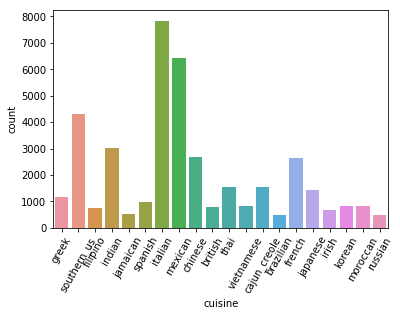

In [3]:
sns.countplot(x="cuisine", data=df)
plt.xticks(rotation=60)

In [25]:
features = df['ingredients'].values

labelEncoder = LabelEncoder()
labels = labelEncoder.fit_transform(df['cuisine'])
labelCount = labels.shape[0]

resampling=RandomOverSampler()
resampling.fit(np.arange(labelCount).reshape(-1,1), labels.reshape(-1,1))
sampledIndex, _ = resampling.sample(np.arange(labelCount).reshape(-1,1), labels.reshape(-1,1))
sampledIndex = sampledIndex.flatten()

featuresSampled = features[sampledIndex]
labelsSampled = labels[sampledIndex]

C:\Users\chosun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'RandomOverSampler' object has no attribute 'sample'

In [18]:
sns.countplot(x="label", data=pd.DataFrame({'label':labelsSampled}));

NameError: name 'labelsSampled' is not defined

In [6]:
cv = CountVectorizer(stop_words=None, token_pattern='.+', tokenizer=lambda x: x.split('|'), max_df=1., min_df=1)
mostLeastIngr = []
for l in labelEncoder.classes_:
    ingr = df.loc[df['cuisine']==l, 'ingredients']
    ingrVect = cv.fit_transform(ingr)
    vocabularyDict = cv.vocabulary_
    invVocabularyDict = {v: k for k, v in vocabularyDict.items()}
    s = np.array(ingrVect.sum(0))[0]
    idx = np.argsort(s)
    mostLeastIngr.append([l, invVocabularyDict[idx[-1]], invVocabularyDict[idx[-2]], invVocabularyDict[idx[-3]], invVocabularyDict[idx[2]], invVocabularyDict[idx[1]], invVocabularyDict[idx[0]]])
mostLeastIngr = pd.DataFrame(mostLeastIngr, columns=['cuisine','top1','top2','top3','bottom3','bottom2','bottom1'])
mostLeastIngr

,cuisine,top1,top2,top3,bottom3,bottom2,bottom1
0,brazilian,salt,onions,olive oil,mackerel,manchego cheese,1% low-fat milk
1,british,salt,all-purpose flour,butter,full fat coconut milk,fruitcake,eye of round roast
2,cajun_creole,salt,onions,garlic,king crab legs,kalamata,( oz.) tomato sauce
3,chinese,soy sauce,sesame oil,salt,green split peas,green soybeans,33% less sodium smoked fully cooked ham
4,filipino,salt,garlic,onions,pearl couscous,"egg noodles, cooked and drained",reduced sodium chicken broth
5,french,salt,sugar,all-purpose flour,frozen raspberries,frozen pie crust,( oz.) tomato sauce
6,greek,salt,olive oil,dried oregano,lean ground meat,lavender,"(10 oz.) frozen chopped spinach, thawed and sq..."
7,indian,salt,onions,garam masala,dipping sauces,paste tomato,kale leaves
8,irish,salt,butter,all-purpose flour,pig feet,flavoring,demi-glace
9,italian,salt,olive oil,garlic cloves,frozen meatballs,frozen mini ravioli,zucchini blossoms


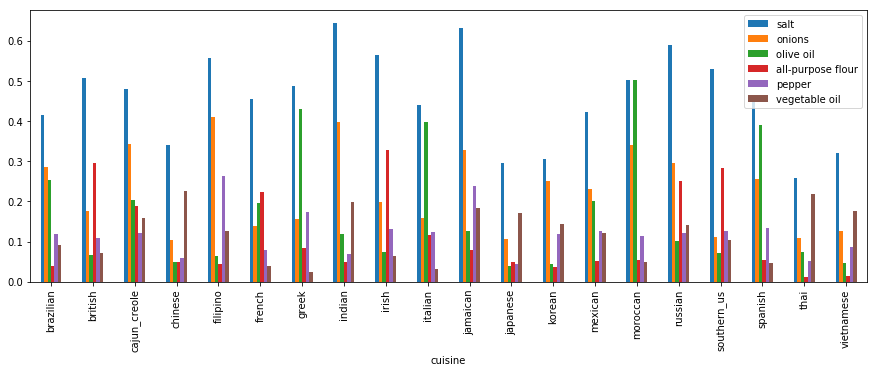

In [7]:
cv = CountVectorizer(stop_words=None, token_pattern='.+', tokenizer=lambda x: x.split('|'), max_df=1., min_df=0.1)
ingrVect = cv.fit_transform(features)
vocabularyDict = cv.vocabulary_
invVocabularyDict = {v: k for k, v in vocabularyDict.items()}
s = np.array(ingrVect.sum(0))[0]
idx = np.argsort(s)
columns =[invVocabularyDict[idx[-1]], invVocabularyDict[idx[-2]], invVocabularyDict[idx[-3]], invVocabularyDict[idx[2]], invVocabularyDict[idx[1]], invVocabularyDict[idx[0]]]
mostLeastIngr = df[['cuisine']].copy()
mostLeastIngr['cuisine']
for i in [-1, -2, -3, 2, 1, 0]:
    mostLeastIngr[invVocabularyDict[idx[i]]] = ingrVect[:, idx[i]].toarray().flatten()
ingrFreqPerCuisine = mostLeastIngr.groupby('cuisine').mean()

ingrFreqPerCuisine.plot.bar(figsize=(15,5));

In [8]:
kfold = KFold(3)
i = 1

for train_idx, validate_idx in kfold.split(featuresSampled, labelsSampled):
    ingr_clf = Pipeline([('Vect', CountVectorizer(stop_words=None, token_pattern='.+', tokenizer=lambda x: x.split('|'), max_df=0.9, min_df=1)),
                         #('FeatureSelection', SelectPercentile(sklearn.feature_selection.chi2, percentile=50)),
                         #('ToDense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                         ('Classif', LinearSVC())])
    ingr_clf.fit(featuresSampled[train_idx], labelsSampled[train_idx])
    predicted = ingr_clf.predict(featuresSampled[validate_idx])
    print(accuracy_score(predicted, labelsSampled[validate_idx]))
    plt.subplot(3,1,i)
    plt.imshow(confusion_matrix(predicted, labelsSampled[validate_idx]))
    i+=1

NameError: name 'featuresSampled' is not defined

In [9]:
ingr_clf = Pipeline([('Vect', CountVectorizer(stop_words=None, token_pattern='.+', tokenizer=lambda x: x.split('|'), max_df=1., min_df=1)),
                     #('ToDense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                     ('Classif', LinearSVC())])
ingr_clf.fit(df['ingredients'], labels)

Pipeline(memory=None,
     steps=[('Vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [13]:
testDf = pd.read_json('./test.json')
testDf['ingredients'] = testDf['ingredients'].apply(lambda x: '|'.join(x))
predictedEncoded = ingr_clf.predict(testDf['ingredients'])
predictedLabels = labelEncoder.inverse_transform(predictedEncoded)
outDf = testDf[['id']]
outDf['cuisine'] = predictedLabels
outDf.to_csv('submission.csv', index=False)